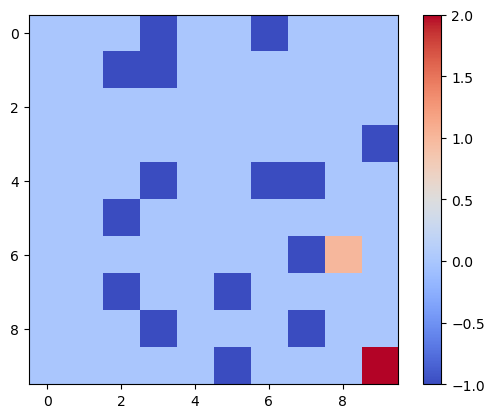

DP Value Table:
[[-0.66645637 -0.62939596 -0.66645637  0.         -0.49162683 -0.43514093
   0.         -0.30264312 -0.22515902 -0.30264312]
 [-0.62939596 -0.58821774  0.          0.         -0.43514093 -0.37237881
  -0.30264312 -0.22515902 -0.13906558 -0.22515902]
 [-0.58821774 -0.54246415 -0.49162683 -0.43514093 -0.37237881 -0.30264312
  -0.22515902 -0.13906558 -0.0434062  -0.13906558]
 [-0.54246415 -0.49162683 -0.43514093 -0.37237881 -0.30264312 -0.22515902
  -0.13906558 -0.0434062   0.062882    0.        ]
 [-0.49162683 -0.43514093 -0.49162683  0.         -0.22515902 -0.13906558
   0.          0.          0.18098     0.3122    ]
 [-0.43514093 -0.37237881  0.         -0.22515902 -0.13906558 -0.0434062
   0.062882    0.18098     0.3122      0.458     ]
 [-0.37237881 -0.30264312 -0.22515902 -0.13906558 -0.0434062   0.062882
   0.18098     0.          0.458       0.62      ]
 [-0.43514093 -0.37237881  0.         -0.0434062   0.062882    0.
   0.3122      0.458       0.62        0.8    

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools



In [ ]:
class MDP:
    def __init__(self, env):
        self.env = env
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        self.state_space = list(itertools.product(range(env.size), range(env.size)))
        self.gamma = 0.9  # Discount factor

    def step(self, state, action):
        """Simulate taking an action from a given state."""
        x, y = state
        dx, dy = action
        next_state = (x + dx, y + dy)
        if not self.env.is_valid_state(next_state):
            next_state = state  # Remain in place if hitting a wall/obstacle
        reward = 1 if next_state == self.env.goal else -0.1
        return next_state, reward

# Step 3: Dynamic Programming (DP) Solution - Value Iteration
class DPAgent:
    def __init__(self, mdp):
        self.mdp = mdp
        self.value_table = {state: 0 for state in mdp.state_space}

    def value_iteration(self, threshold=0.001):
        delta = float("inf")
        while delta > threshold:
            delta = 0
            for state in self.mdp.state_space:
                if state == self.mdp.env.goal or state in self.mdp.env.obstacles:
                    continue
                v = self.value_table[state]
                self.value_table[state] = max(
                    sum(
                        [self._get_transition_prob(state, action) *
                         (reward + self.mdp.gamma * self.value_table[next_state])
                         for next_state, reward in self._get_possible_outcomes(state, action)]
                    ) for action in self.mdp.actions
                )
                delta = max(delta, abs(v - self.value_table[state]))
    
    def _get_possible_outcomes(self, state, action):
        next_state, reward = self.mdp.step(state, action)
        return [(next_state, reward)]
    
    def _get_transition_prob(self, state, action):
        return 1  # Deterministic for simplicity


In [ ]:
# Step 3: Dynamic Programming (DP) Solution - Value Iteration
class DPAgent:
    def __init__(self, mdp):
        self.mdp = mdp
        self.value_table = {state: 0 for state in mdp.state_space}

    def value_iteration(self, threshold=0.001):
        delta = float("inf")
        while delta > threshold:
            delta = 0
            for state in self.mdp.state_space:
                if state == self.mdp.env.goal or state in self.mdp.env.obstacles:
                    continue
                v = self.value_table[state]
                self.value_table[state] = max(
                    sum(
                        [self._get_transition_prob(state, action) *
                         (reward + self.mdp.gamma * self.value_table[next_state])
                         for next_state, reward in self._get_possible_outcomes(state, action)]
                    ) for action in self.mdp.actions
                )
                delta = max(delta, abs(v - self.value_table[state]))
    
    def _get_possible_outcomes(self, state, action):
        next_state, reward = self.mdp.step(state, action)
        return [(next_state, reward)]
    
    def _get_transition_prob(self, state, action):
        return 1  # Deterministic for simplicity


In [ ]:
class QLearningAgent:
    def __init__(self, mdp, alpha=0.1, epsilon=0.1, episodes=500):
        self.mdp = mdp
        self.alpha = alpha  # Learning rate
        self.epsilon = epsilon  # Exploration rate
        self.episodes = episodes
        self.q_table = {(state, action): 0 for state in mdp.state_space for action in mdp.actions}

    def train(self):
        for _ in range(self.episodes):
            state = self.mdp.env.start
            while state != self.mdp.env.goal:
                action = self._choose_action(state)
                next_state, reward = self.mdp.step(state, action)
                self._update_q(state, action, reward, next_state)
                state = next_state
    
    def _choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.mdp.actions)
        q_values = {action: self.q_table[(state, action)] for action in self.mdp.actions}
        return max(q_values, key=q_values.get)
    
    def _update_q(self, state, action, reward, next_state):
        best_next_action = max(self.mdp.actions, key=lambda a: self.q_table[(next_state, a)])
        td_target = reward + self.mdp.gamma * self.q_table[(next_state, best_next_action)]
        td_error = td_target - self.q_table[(state, action)]
        self.q_table[(state, action)] += self.alpha * td_error


In [ ]:
# Step 5: Benchmarking and Comparison
def benchmark(env, dp_agent, q_agent):
    # DP agent evaluation
    dp_agent.value_iteration()
    dp_values = np.array([[dp_agent.value_table[(i, j)] for j in range(env.size)] for i in range(env.size)])
    print("DP Value Table:")
    print(dp_values)
    
    # Q-learning evaluation
    q_agent.train()
    q_values = np.array([[max(q_agent.q_table[((i, j), a)] for a in q_agent.mdp.actions) for j in range(env.size)] for i in range(env.size)])
    print("Q-Learning Value Table:")
    print(q_values)

# Main Execution
env = GridEnvironment()
env.render()

mdp = MDP(env)
dp_agent = DPAgent(mdp)
q_agent = QLearningAgent(mdp)

benchmark(env, dp_agent, q_agent)